<img src='https://github.com/wekeo/ai4EM_MOOC/raw/04147f290cfdcce341f819eab7ad037b95f25600/img/ai4eo_logos.jpg' alt='Logo EU Copernicus WEkEO' align='center' width='100%'></img>


# WEKEO TRAINING

<div style="text-align: right"><i> INTERMEDIATE LEVEL </i></div>

***
<center><h1>Climate Change: Tundra wildfires in Siberia </h1></center>

***
**General Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**General Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Run" and select "Run All Above Selected Cell".<br>

**General Note 3**: To explore more (Python and R) content, there is our [**Jupyter Catalogue**](https://notebooks.apps.mercator.dpi.wekeo.eu/), and if you seek support, there are plenty of useful resources in our [**Help Center**](https://help.wekeo.eu/en/). Feel free to contact us using our [**live chat widget**](https://www.wekeo.eu/support) or asynchronously at [support@wekeo.eu](support@wekeo.eu) ! <br>

***

# Table of contents
- [1. Introduction](#1.-Introduction)
- [2. Setting up the R environment](#2.-Setting-up-the-R-environment)
- [3. Data Access](#3.-Data-Access)
- [4. Input](#4.-Input)
- [5. Plot](#5.-Plot)
    - [5.1. Basic Plot of carbon monoxide](#5.1.-Basic-Plot-of-carbon-monoxide)
    - [5.2. Visualization of CO at a single point](#5.2.-Visualization-of-CO-at-a-single-point)
    - [5.3. Comparison with concentration of No2](#5.3.-Comparison-with-concentration-of-No2)
- [6. Use of Sentinel 3 data](#6.-Use-of-Sentinel-3-data)
- [7. Conclusion](#7.-Conclusion)


# 1. Introduction

[Go back to the "Table of contents"](#Table-of-contents)


This training focuses on Tundra wildfires in 2020 in Siberia. In the summer of 2020, Siberia experienced massive wildfires that burned over 20 million hectares, mainly in the Yakutia region and the Russian Arctic. These fires were driven by extreme climate conditions: record-breaking temperatures exceeding 38°C in some areas, prolonged drought, and thawing permafrost.

Unlike typical forest fires, these also affected the tundra a fragile ecosystem that is usually not highly flammable. The fires released large amounts of greenhouse gases, particularly CO₂ and methane trapped in the frozen soil. They also threatened local biodiversity, worsened air quality over long distances, and contributed to accelerating climate change in the Arctic.

This training will allow you to see the evolution of wildfire during the summer 2020 with the mass concentration of Carbon monoxide and nitrogen dioxide. Moreover we will use an observation product, images of sentinel 3 to see the wildfire.


# 2. Setting up the R environment
[Go back to the "Table of contents"](#Table-of-contents)

The Jupyter Notebook must be set up with all the necessary available tools from the Jupyter Notebook ecosystem. Here is the list of the modules we will be using in this exercise.

| Module name | Description |
| :---: | :---|
| **ggplot2** |[ggplot2](https://ggplot2.tidyverse.org/) is a system for declaratively creating graphics. |
| **dplyr** |[dplyr](https://dplyr.tidyverse.org/) is a library for manipulating data. |
| **RColorBrewer** |[RColorBrewer](https://cran.r-project.org/web/packages/RColorBrewer/index.html) is a library for color palettes in plot. |
| **ncdf4** |[ncdf4](https://cran.r-project.org/web/packages/ncdf4/index.html) is an interface for the 'NetCDF' file formats. |
| **gridExtra** |[gridExtra](https://cran.r-project.org/web/packages/gridExtra/index.html) is a library for arranging multiple grid-based plots on a page. |
| **lubridate** |[lubridate](https://www.rdocumentation.org/packages/lubridate/versions/1.9.3) is a library for fast and user-friendly analysis of date-time data. |
|**raster**|[raster](https://www.rdocumentation.org/packages/raster/versions/3.6-30/topics/raster) is a package for reading, writing, manipulating, analyzing and modeling of spatial data. |

In [1]:
# Modules system
# for ignoring Warning message
options(warn = -1) 

## Load Packages
library(ggplot2)        # System to creating graphycs
library(dplyr)          # Operators for data manipulation
library(RColorBrewer)   # For color palettes
library(ncdf4)          # High-level interface to netCDF data files
library(gridExtra)      # To arrange multiple grid-based plots on a page
library(lubridate)      # Fast and user friendly parsing of date-time data
library(raster)         # Toolkit for image processing


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: sp


Attaching package: ‘raster’


The following object is masked from ‘package:dplyr’:

    select




If the required R libraries are not installed, you can use the following command to install them:

<center><h4> install.packages(c("ggplot2", "dplyr", "RColorBrewer", "ncdf4", "gridExtra", "lubridate", "raster")) </h4></center>

# 3. Data Access

[Go back to the "Table of contents"](#Table-of-contents)


From the [WEKEO viewer](https://www.wekeo.eu/data), you can explore all the products available with many filters to select the region you are interested in, the parameters you want to study, etc.

WEkEO is a European platform providing access to environmental data, developed by the European Union in partnership with agencies like ESA (European Space Agency), EUMETSAT, and Mercator Ocean. It provides access to a wide range of Earth observation data.

For this training, we will use the following data:

* **Full Name**:CAMS_GLOBAL_REANALYSIS_EAC4
* **Spatial region**: Siberia area from Lat=(60.5ºN, 75ºN), Lon=(139ºE,161ºE)
* **Elevation**: At 1000 hPa  
* **Variables**: Carbon monoxide and nitrogen dioxide
* **Time period**: Daily means from 2020-04-01 to 2023-10-31

 and: 
* **Full Name**: SENTINEL-3
* **Time period**: Images on 2020-06-08 and  2020-06-27

**You don't have to download it**, the files are already downloading in this training.

__Optional:__ Go to the `Data store` and try to download this data selection. Note: You'll need to have your own WEKEO credentials -- username and password. Creating an account is free of charge and available [here](https://www.wekeo.eu/register).

# 4. Input
[Go back to the "Table of contents"](#Table-of-contents)


In [2]:
# Set the path for the NetCDF files
file <- "data/data_co.nc"

In [7]:
# Load NetCDF File
data <- nc_open(file)

# Print all information in the Netcdf File
print(data)

File data/data_co.nc (NC_FORMAT_NETCDF4):

     1 variables (excluding dimension variables):
        float co[longitude,latitude,pressure_level,valid_time]   (Chunking: [30,20,1,976])  (Compression: shuffle,level 1)
[1] ">>>> WARNING <<<  attribute GRIB_paramId is an 8-byte value, but R"
[1] "does not support this data type. I am returning a double precision"
[1] "floating point, but you must be aware that this could lose precision!"
[1] ">>>> WARNING <<<  attribute GRIB_numberOfPoints is an 8-byte value, but R"
[1] "does not support this data type. I am returning a double precision"
[1] "floating point, but you must be aware that this could lose precision!"
[1] ">>>> WARNING <<<  attribute GRIB_stepUnits is an 8-byte value, but R"
[1] "does not support this data type. I am returning a double precision"
[1] "floating point, but you must be aware that this could lose precision!"
[1] ">>>> WARNING <<<  attribute GRIB_uvRelativeToGrid is an 8-byte value, but R"
[1] "does not support this 

In [4]:
# Access Data
latitude <- ncvar_get(data, "latitude")  # Name of the latitude variable
longitude <- ncvar_get(data, "longitude")  # Name of the longitude variable
time <- ncvar_get(data, "valid_time")  # Name of the time variable

co <- ncvar_get(data, "co")     # Carbon monoxide


In [5]:
# visualisation of variable
print(dim(co)) # know the dimension of the variable
print (co[5,5,2]) # know the value depending on longitude, latitude and time

[1]  30  20 976
[1] 9.618294e-08


In [6]:
# visualisation of variable time
print (time[1]) # know the value of the first time

[1] 1590969600


In [8]:
# Variable time is the number of seconds since 1970-01-01 00:00:00, we should convert:
time_values <- as.POSIXct(time, origin = "1970-01-01", tz = "GMT")
time_values[1:10]

 [1] "2020-06-01 00:00:00 GMT" "2020-06-01 03:00:00 GMT"
 [3] "2020-06-01 06:00:00 GMT" "2020-06-01 09:00:00 GMT"
 [5] "2020-06-01 12:00:00 GMT" "2020-06-01 15:00:00 GMT"
 [7] "2020-06-01 18:00:00 GMT" "2020-06-01 21:00:00 GMT"
 [9] "2020-06-02 00:00:00 GMT" "2020-06-02 03:00:00 GMT"

# 5. Plot

[Go back to the "Table of contents"](#Table-of-contents)
    
## 5.1. Basic Plot of carbon monoxide
[Go back to the "Table of contents"](#Table-of-contents)

In [9]:
# Determine figure size
options(repr.plot.width =12, repr.plot.height = 6) 

In [10]:
# we create a dataframe
index_time=7
df <- data.frame(expand.grid(longitude, latitude), co = as.vector(co[,,index_time]))
names(df) <- c("Longitude", "Latitude", "co")

In [11]:
# visualisation of the dataframe
df[1:10,]

Longitude Latitude co          
1  139.00    74.75    9.370873e-08
2  139.75    74.75    9.361943e-08
3  140.50    74.75    9.353460e-08
4  141.25    74.75    9.341906e-08
5  142.00    74.75    9.326529e-08
6  142.75    74.75    9.304375e-08
7  143.50    74.75    9.281925e-08
8  144.25    74.75    9.260648e-08
9  145.00    74.75    9.238286e-08
10 145.75    74.75    9.215046e-08

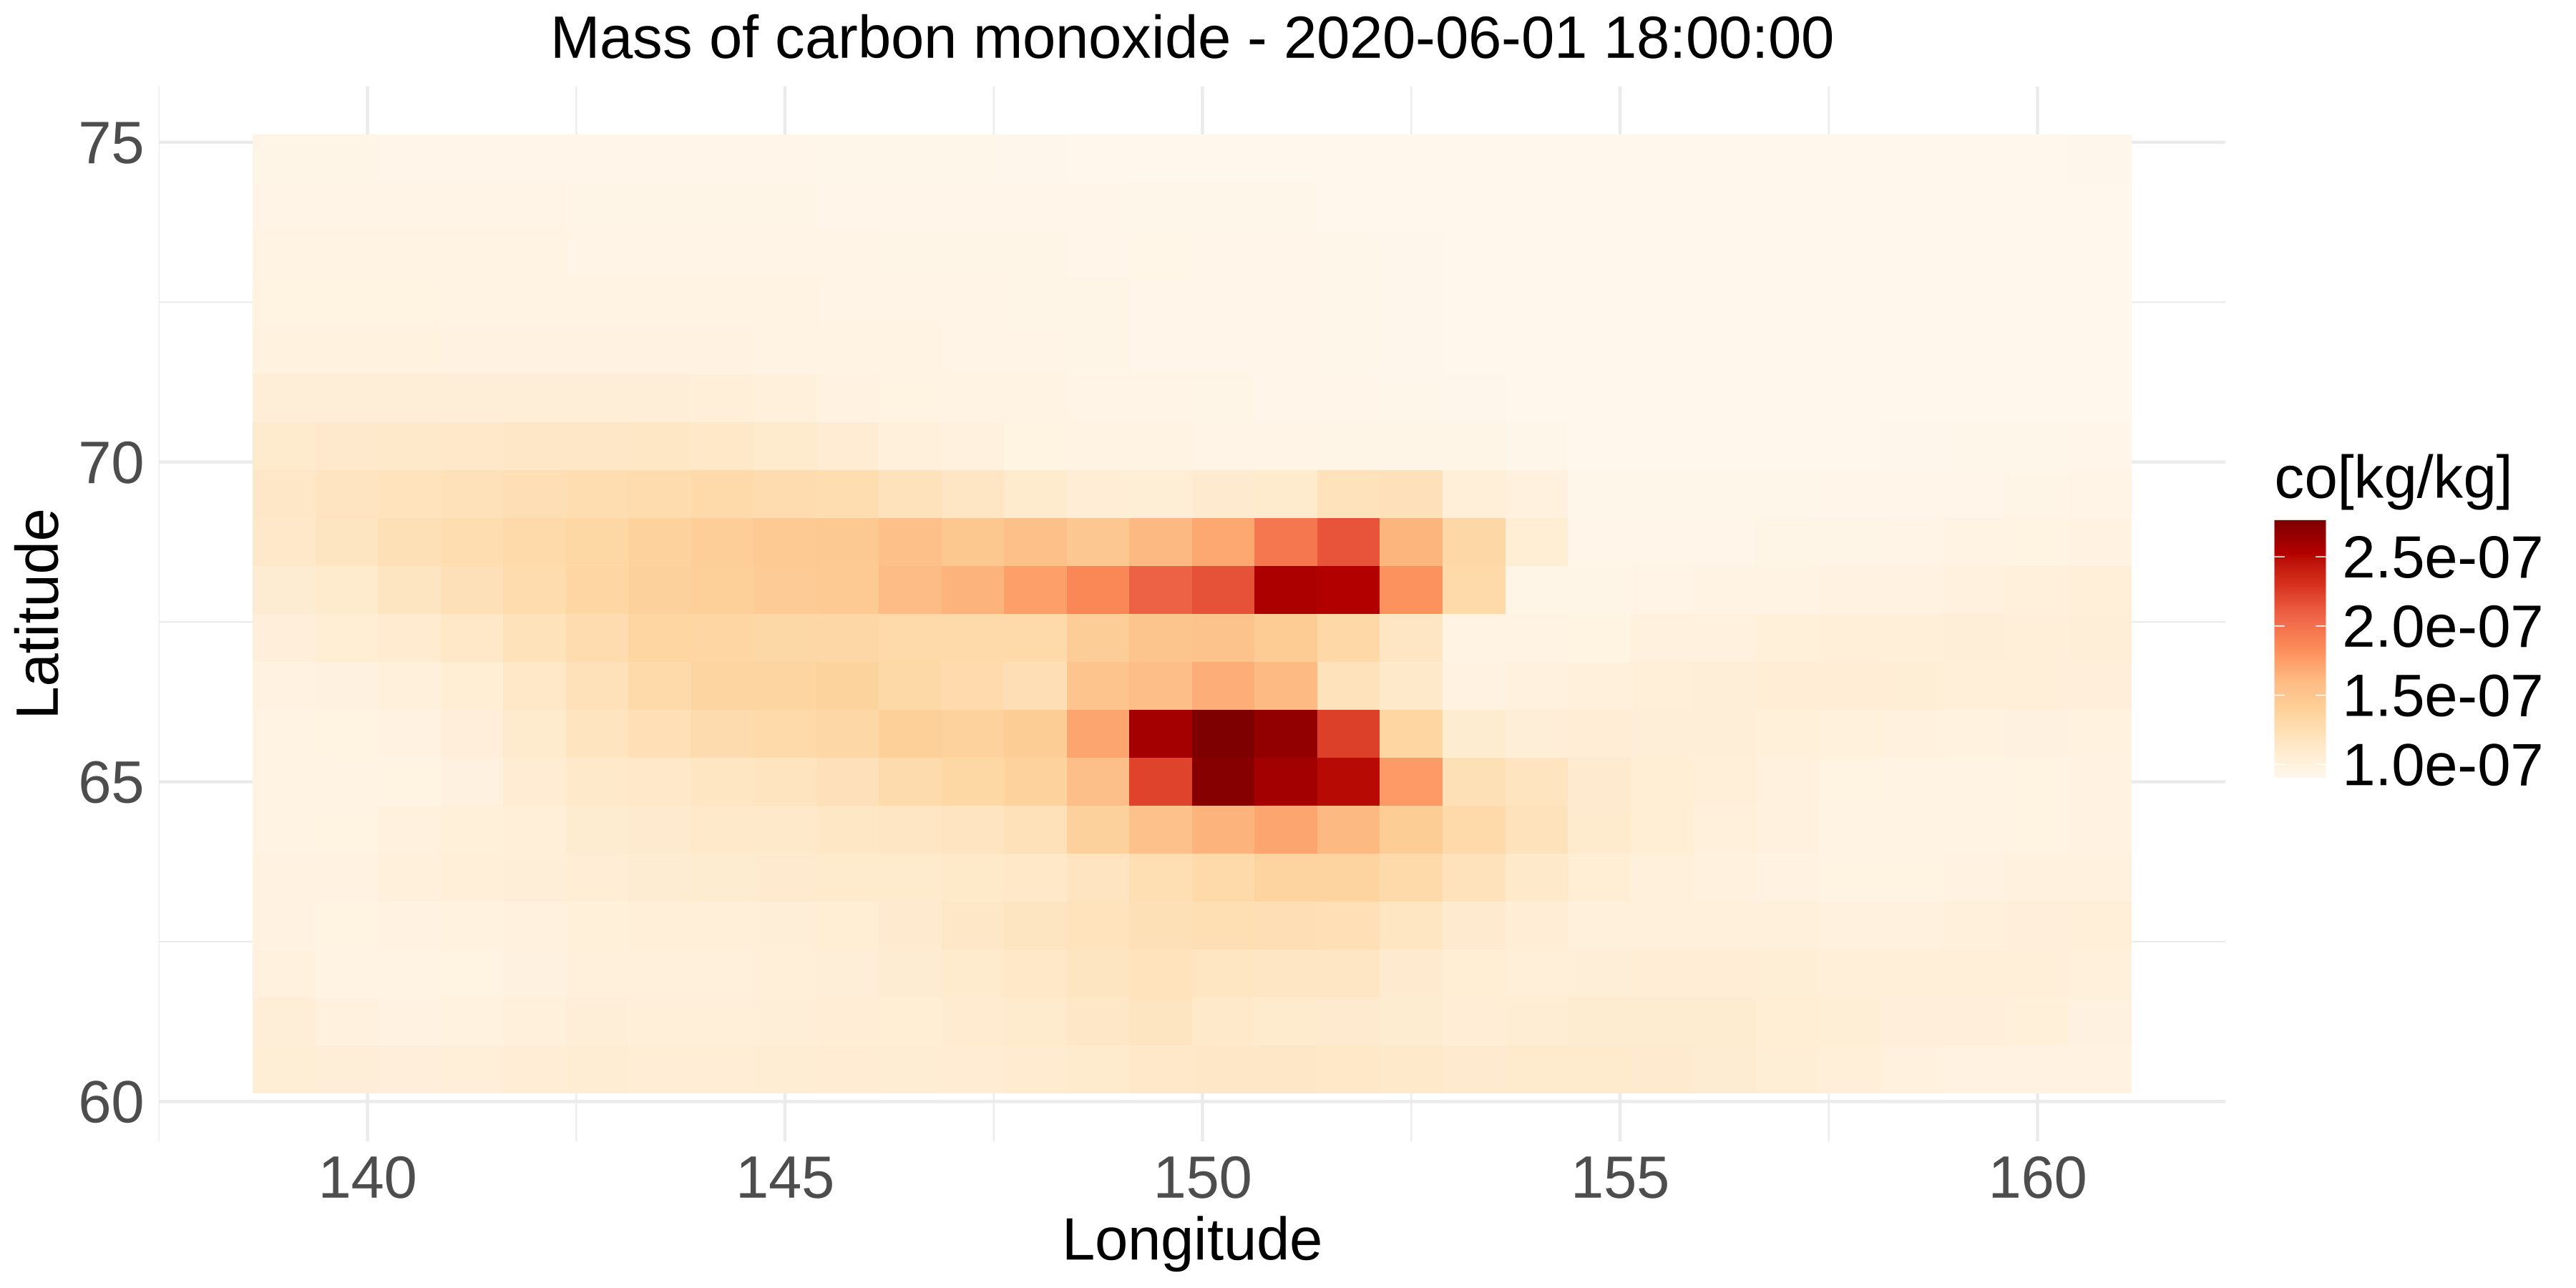

In [12]:
# Plotting
p <- ggplot() +

# Add CO data 
geom_tile(data = df, aes(x=Longitude, y=Latitude, fill = co)) +

# Color scale options limits = c()
scale_fill_gradientn(colors = brewer.pal(9, "OrRd"),  name="co[kg/kg]",limits = c(), na.value = "grey") +

# General aesthetic options
theme_light() +

# Title and subtitle
labs(title = paste("Mass of carbon monoxide - ",time_values[index_time],sep=''),
     x = "Longitude",
     y = "Latitude")+

# Legend position and aesthetic options
theme_minimal()+

theme(
    axis.text.x = element_text(size = 20),  # Increase the size of the x-axis values
    axis.text.y = element_text(size = 20),  # Increase the size of the y-axis values
    plot.title = element_text(hjust = 0.5, size = 20),  # Center and increase the size of the title
    axis.title.x = element_text(size = 20),  # Increase the size of the x-axis title
    axis.title.y = element_text(size = 20),  # Increase the size of the y-axis title
    legend.text = element_text(size = 20),    # Increase the size of the legend text
    legend.title = element_text(size = 20)     # Increase the size of the legend title
)   
#p
# to save the figure
ggsave("./figures/basic_figure.png", plot = p, width = 12, height = 6, dpi = 300)

IRdisplay::display_png(file = "./figures/basic_figure.png", width = 800, height = 600)

On this map we see a very high concentration of Carbon Monoxide around longitude 150°E and latitude between 62°N and 70°N.

## 5.2. Visualization of CO at a single point
[Go back to the "Table of contents"](#Table-of-contents)


In the previous figure, we saw a high concentration of carbon monoxide, especially at the point with the following coordinates: 
- Longitude :150°E 
- Latitude: 65.5°N

We will visualize the CO concentration at this point over a long period: June to October 2020.

We use the line below to define the index of longitude and latitude that we should use.

In [13]:
# find index of the neareast coordinates
index_longitude <- which.min(abs(longitude-150))
index_latitude <- which.min(abs(latitude-65.5))

# print the closest latitude and longitude
print(longitude[index_longitude])
print(latitude[index_latitude])

[1] 150.25
[1] 65.75


In [14]:
# find index of time
index1 <- which.min(abs(difftime(time_values, ymd_hms("2020-06-01 00:00:00"), units = "secs")))
index2 <- which.min(abs(difftime(time_values, ymd_hms("2020-10-31 23:00:00"), units = "secs")))

Now we create a CO dataframe for a given longitude and latitude. This way, the dataframe will only be dependent of time.

In [15]:
# create a dataframe 
df_co=data.frame(date=time_values,co=co[index_longitude,index_latitude,])[index1:index2,]

# dataframe visualization
df_co[1:10,]

date                co          
1  2020-06-01 00:00:00 1.803991e-07
2  2020-06-01 03:00:00 1.699877e-07
3  2020-06-01 06:00:00 1.614187e-07
4  2020-06-01 09:00:00 1.620223e-07
5  2020-06-01 12:00:00 2.041371e-07
6  2020-06-01 15:00:00 2.602561e-07
7  2020-06-01 18:00:00 2.761696e-07
8  2020-06-01 21:00:00 1.695357e-07
9  2020-06-02 00:00:00 1.264681e-07
10 2020-06-02 03:00:00 1.139877e-07

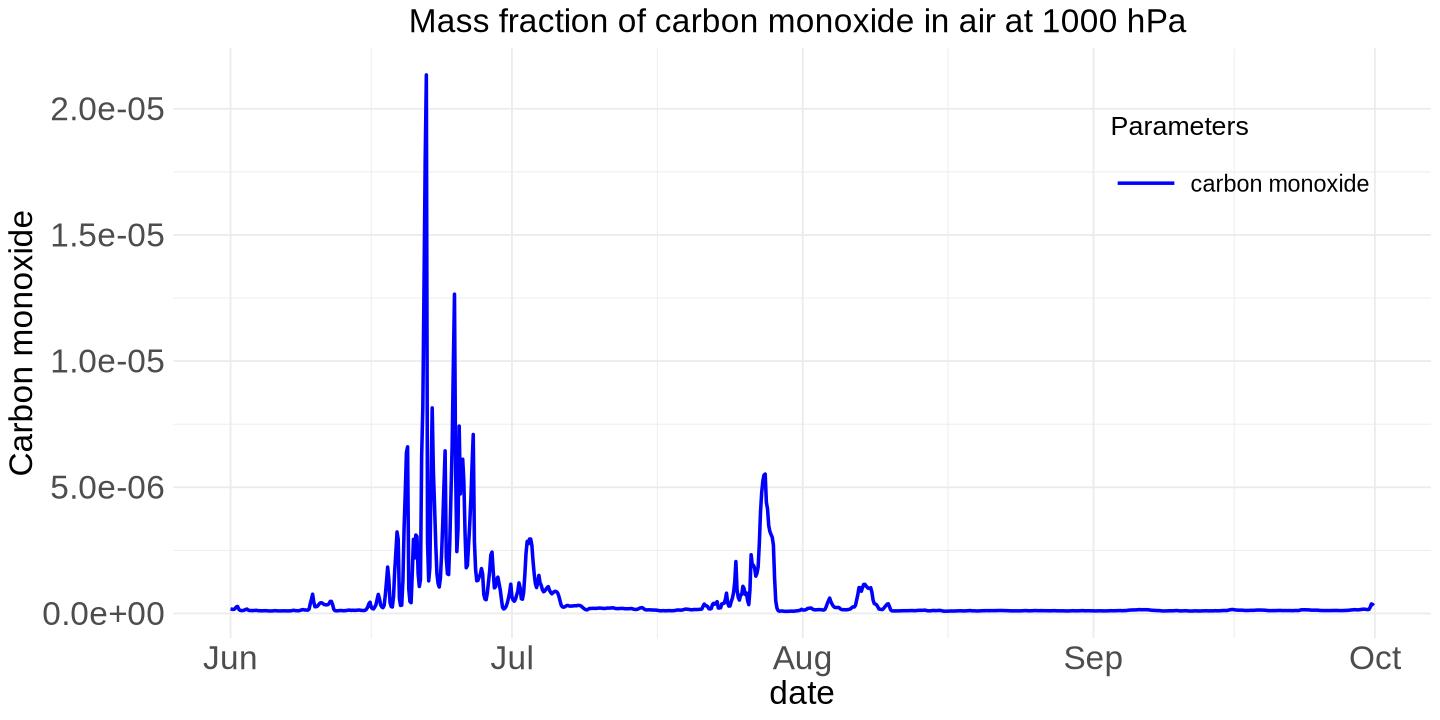

In [16]:
# Plot the graph with ggplot2
ggplot(df_co, aes(x = date)) +
    geom_line(aes(y = co, color = "carbon monoxide"), size = 1) +
    scale_y_continuous(
        name = "Carbon monoxide", 
      ) +

  ggtitle("Mass fraction of carbon monoxide in air at 1000 hPa ") +
  xlab("date") +
  ylab("Cabon monoxide") +
  scale_color_manual(
    name = "Parameters", 
    values = c("blue"))+
  theme_minimal() +

  theme(
    legend.position = c(0.85, 0.8),
    legend.title = element_text(size = 16),   # Increase tge size of legend title
    legend.text = element_text(size = 14),    # Increase tge size of text in the legend
    legend.key.size = unit(1.5, "cm"),  
    axis.text.x = element_text(size = 20),  # Increase the size of the x-axis values
    axis.text.y = element_text(size = 20),  # Increase the size of the y-axis values
    plot.title = element_text(hjust = 0.5, size = 20),  # Center and increase the size of the title
    axis.title.x = element_text(size = 20),  # Increase the size of the x-axis title
    axis.title.y = element_text(size = 20)    # Increase the size of the y-axis title
      )


The figure shows a high concentration of CO from mid-June to the end of June. Another period of abnormally high concentration appears at the end of July 2020, likely due to wildfires.

## 5.3. Comparison with concentration of No2
[Go back to the "Table of contents"](#Table-of-contents)
    
NO₂ is an atmospheric pollutant that serves as an indicator of pollution from road traffic, industrial activity, and biomass combustion. In our case, the observed NO₂ levels are likely due to biomass burning, as there is no significant human activity in the studied area.

For this part we will first open the netcdf file, load variables, merged the two variables in a dataframe and then plot a time series of CO and No2.

First we load files:

In [17]:
file <- "data/data_No2.nc"
nc1 <- nc_open(file)

No2 <- ncvar_get(nc1, "tcno2")
time_No2 <- ncvar_get(nc1, "valid_time")
longitude_No2 <- ncvar_get(nc1, "longitude")
latitude_No2 <- ncvar_get(nc1, "latitude")

time_No2<- as.POSIXct(time_No2, origin = "1970-01-01", tz = "GMT")

The coordinate that we want to study is the same as for CO: 
- Longitude :150°E 
- Latitude: 65.5°N

We use the the line below to define the index of longitude and latitude that we should use.

In [18]:
# find index of the neareast coordinates
index_longitude <- which.min(abs(longitude_No2-150))
index_latitude <- which.min(abs(latitude_No2-65.5))

# print the closest latitude and longitude
print(longitude_No2[index_longitude])
print(latitude_No2[index_latitude])

[1] 150.25
[1] 65.75


In [19]:
# find index of time
index1 <- which.min(abs(difftime(time_values, ymd_hms("2020-06-01 00:00:00"), units = "secs")))
index2 <- which.min(abs(difftime(time_values, ymd_hms("2020-10-31 23:00:00"), units = "secs")))

In [20]:
# create a dataframe 
df_No2=data.frame(date=time_No2,No2=No2[index_longitude,index_latitude,])[index1:index2,]

# dataframe visualization
df_No2[1:10,]

date                No2         
1  2020-04-01 00:00:00 6.107833e-07
2  2020-04-01 03:00:00 6.944691e-07
3  2020-04-01 06:00:00 8.232009e-07
4  2020-04-01 09:00:00 1.509994e-06
5  2020-04-01 12:00:00 1.331645e-06
6  2020-04-01 15:00:00 1.181329e-06
7  2020-04-01 18:00:00 1.032536e-06
8  2020-04-01 21:00:00 6.549078e-07
9  2020-04-02 00:00:00 6.636219e-07
10 2020-04-02 03:00:00 7.522430e-07

Finally, we merge the two dataframes: CO and NO2 datasets.

In [21]:
# Merge the two dataframes
df_final <- df_co %>%
  left_join(df_No2, by = "date")

# dataframe visualization
df_final[1:10,]

date                co           No2         
1  2020-06-01 00:00:00 1.803991e-07 2.009771e-06
2  2020-06-01 03:00:00 1.699877e-07 1.548220e-06
3  2020-06-01 06:00:00 1.614187e-07 1.387591e-06
4  2020-06-01 09:00:00 1.620223e-07 1.659122e-06
5  2020-06-01 12:00:00 2.041371e-07 2.777852e-06
6  2020-06-01 15:00:00 2.602561e-07 2.306706e-06
7  2020-06-01 18:00:00 2.761696e-07 1.527091e-06
8  2020-06-01 21:00:00 1.695357e-07 1.239373e-06
9  2020-06-02 00:00:00 1.264681e-07 1.035074e-06
10 2020-06-02 03:00:00 1.139877e-07 8.798382e-07

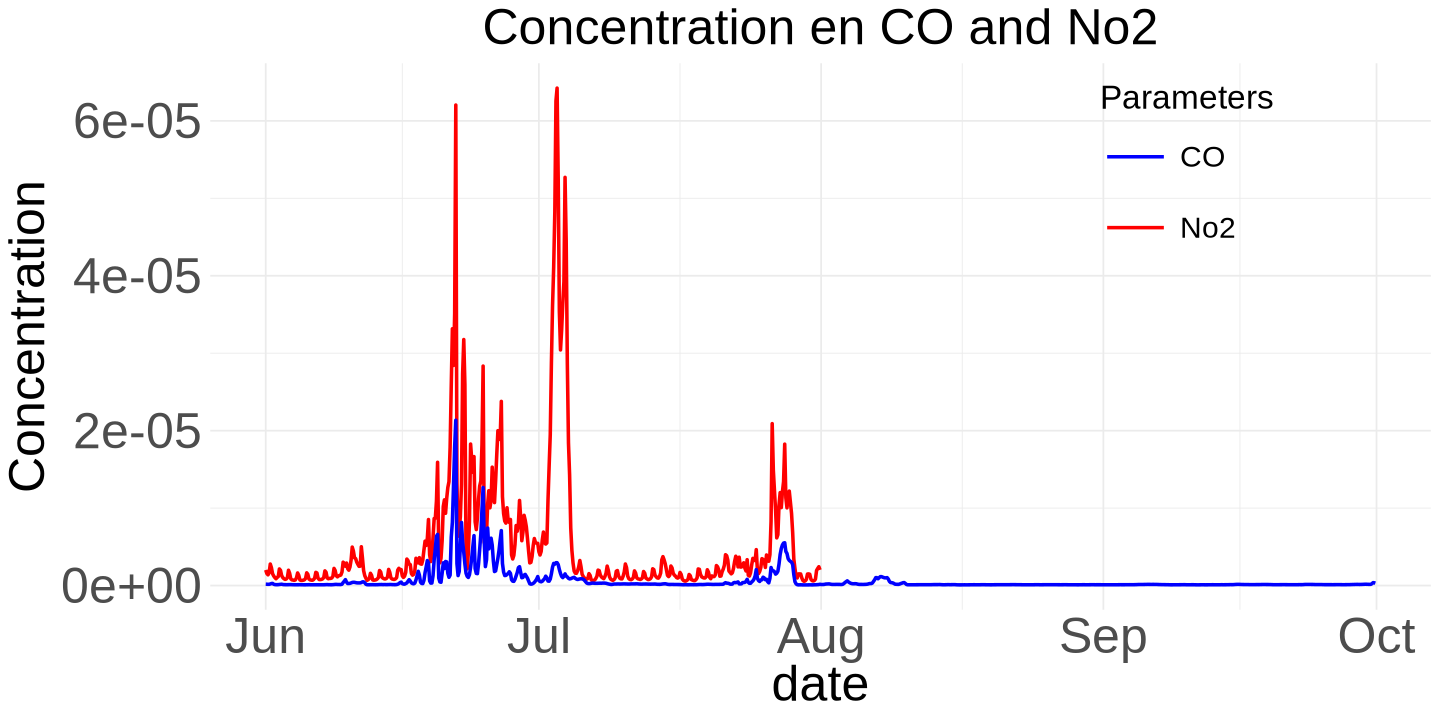

In [22]:
# Plot the graph with ggplot2
ggplot(df_final, aes(x = date)) +
    geom_line(aes(y = No2, color = "No2"), size = 1) +
      geom_line(aes(y = co, color = "CO"), size = 1) +  # Monthly mean

    scale_y_continuous(
        name = "Concentration", 
      ) +

  ggtitle("Concentration en CO and No2") +
  scale_color_manual(
    name = "Parameters", 
    values = c("blue", "red"))+
  theme_minimal() +

  theme(
    legend.position = c(0.8, 0.8),
    legend.title = element_text(size = 20),   # Increase tge size of legend title
    legend.text = element_text(size = 18),    # Increase tge size of text in the legend
    legend.key.size = unit(1.5, "cm"),  
    axis.text.x = element_text(size = 30),  # Increase the size of the x-axis values
    axis.text.y = element_text(size = 30),  # Increase the size of the y-axis values
    plot.title = element_text(hjust = 0.5, size = 30),  # Center and increase the size of the title
    axis.title.x = element_text(size = 30),  # Increase the size of the x-axis title
    axis.title.y = element_text(size = 30)    # Increase the size of the y-axis title
      )
ggsave("./figures/Time_series_NO2_CO.png" ,width =12, height = 18,  dpi = 300)

The figure reveals a strong correlation between CO and NO₂ concentrations. Elevated CO levels are consistently associated with increased NO₂ levels. Together, these indicators can be used to identify fire-affected areas. 

However in July there is a peak of No2 and not in CO. This may be due to more efficient combustion in the tundra vegetation, resulting in less CO and more NO₂. Additionally, the longer atmospheric lifetime and higher mobility of CO might explain its lower local concentration, as it may have already dispersed.

# 6. Use of Sentinel 3 data
[Go back to the "Table of contents"](#Table-of-contents)

Now we will use satellite image data from Sentinel 3.

Sentinel-3 is a satellite from the European Copernicus program, developed by the European Space Agency (ESA) to monitor the Earth’s land, oceans, atmosphere, and ice. It carries several instruments, including OLCI (for optical imaging), SLSTR (for surface temperature), and SRAL (for radar altimetry). Sentinel-3 provides critical data for climate monitoring, natural resource management, fire detection, and atmospheric and marine pollution assessment. With its wide swath and frequent revisit time, Sentinel-3 plays a key role in observing and understanding global environmental changes.

We will use Sentinel-3 data to assess the burn area. The selected dates are the ones previously analyzed: June 8 and 27.

In [24]:
# Set path to folder containing Sentinel-3 files
folder <- "./data/S3_20200608/"

# Open NetCDF files for red, green, and blue bands
red_nc=nc_open(paste(folder,"S3_radiance_an.nc",sep=''))
green_nc=nc_open(paste(folder,"S5_radiance_an.nc",sep=''))
blue_nc=nc_open(paste(folder,"S6_radiance_an.nc",sep=''))

In [25]:
# Extract the radiance data variables from each NetCDF file
red_var=ncvar_get(red_nc,'S3_radiance_an')
green_var=ncvar_get(green_nc,'S5_radiance_an')
blue_var=ncvar_get(blue_nc,'S6_radiance_an')

In [26]:
# Convert the extracted data arrays into raster objects
red_raster=raster(red_var)
green_raster=raster(green_var)
blue_raster=raster(blue_var)

In [27]:
# Apply contrast stretching to improve image visualization
band_red_stretch_date1 <- stretch(red_raster, minq = 0.05, maxq = 0.95)
band_green_stretch_date1  <- stretch(green_raster, minq = 0.05, maxq = 0.95)
band_blue_stretch_date1  <- stretch(blue_raster, minq = 0.05, maxq = 0.95)

In [28]:
# Stack the stretched bands to create an RGB raster stack
image_rgb <- stack(band_red_stretch_date1 , band_green_stretch_date1 , band_blue_stretch_date1 )

png 
  2

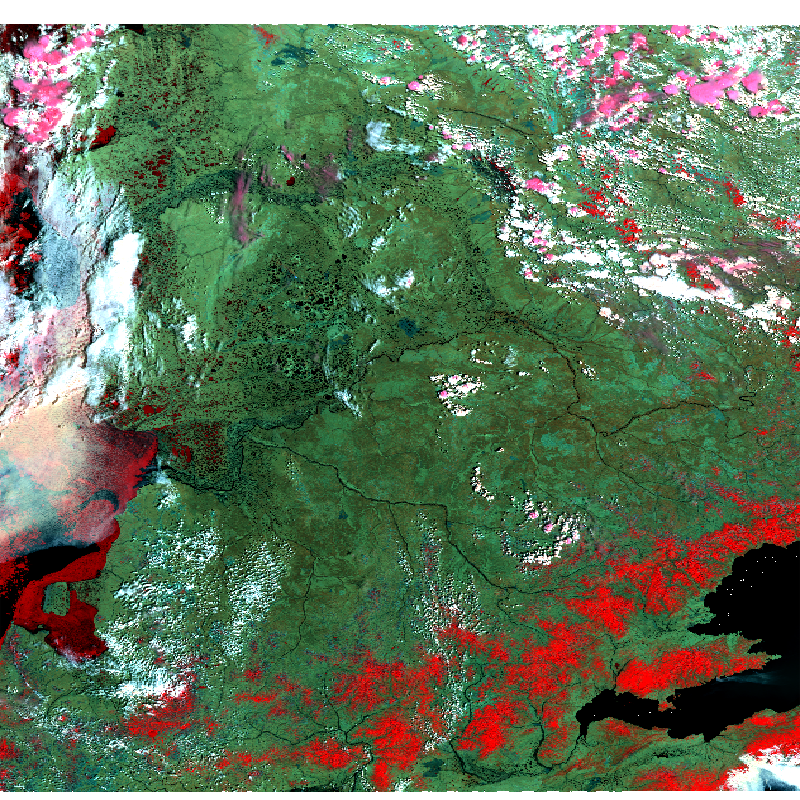

In [29]:
# Define the output filename for the PNG image
output_file <- "./figures/sentinel3_20200608.png"

# Open a PNG graphics device with specified dimensions
png(filename = output_file, width = 800, height = 800)  # Adjust width and height if needed

# Plot the RGB composite image using the stacked raster
plotRGB(image_rgb, r = 1, g = 2, b = 3)

# Close the graphics device to finalize the PNG file
dev.off()

# Display the generated PNG image (if using an interactive environment like Jupyter)
IRdisplay::display_png(file = output_file)

This is a color image captured by the satellite. The white and red areas correspond to clouds at different altitudes.

Now, we will look at the same image taken 19 days later to observe the changes

png 
  2

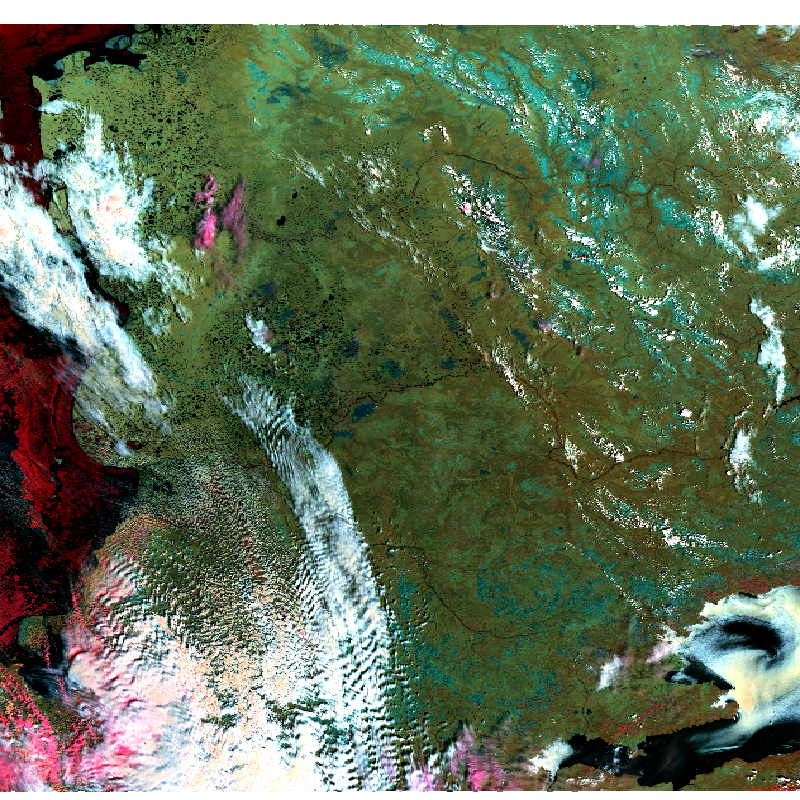

In [30]:
# Set path to folder containing Sentinel-3 files
folder <- "./data/S3_20200627/"

# Open NetCDF files for red, green, and blue bands
red_nc=nc_open(paste(folder,"S3_radiance_an.nc",sep=''))
green_nc=nc_open(paste(folder,"S5_radiance_an.nc",sep=''))
blue_nc=nc_open(paste(folder,"S6_radiance_an.nc",sep=''))

# Extract the radiance data variables from each NetCDF file
red_var=ncvar_get(red_nc,'S3_radiance_an')
green_var=ncvar_get(green_nc,'S5_radiance_an')
blue_var=ncvar_get(blue_nc,'S6_radiance_an')

# Convert the extracted data arrays into raster objects
red_raster=raster(red_var)
green_raster=raster(green_var)
blue_raster=raster(blue_var)

# Apply contrast stretching to improve image visualization
band_red_stretch_date2  <- stretch(red_raster, minq = 0.05, maxq = 0.95)
band_green_stretch_date2  <- stretch(green_raster, minq = 0.05, maxq = 0.95)
band_blue_stretch_date2  <- stretch(blue_raster, minq = 0.05, maxq = 0.95)

# Stack the bands to create a raster stack
image_rgb <- stack(band_red_stretch_date2 , band_green_stretch_date2 , band_blue_stretch_date2 )

output_file <- "./figures/sentinel3_20200627.png"

# Open a PNG graphics device
png(filename = output_file, width = 800, height = 800)  # Adjust width and height as needed
# Create the plot
plotRGB(image_rgb, r = 1, g = 2, b = 3)
# Close the graphics device
dev.off()
IRdisplay::display_png(file = "./figures/sentinel3_20200627.png")

In this image, we can see darker patches. These correspond to areas affected by fires, the burned zones. Many such patches are visible. Additionally, some forest fires are still ongoing.

Sentinel-3 satellite imagery allows us to visualize the extent of forest fires

# 7. Conclusion
[Go back to the "Table of contents"](#Table-of-contents)

<div class="alert alert-block alert-success">
<b>Congratulations!</b> You have successfully completed the introductory-intermediate tutorial on using WEKEO products to evaluate tundra wildfire in SIberia. Throughout this tutorial, we have explained the basic tools necessary to access and visualize observation and satellite data, generate different types of plots.
<br><br>

In this tutorial, you acquired all the information you need to:
 


* Access NetCDF datasets and Multispectral images.

* Navigate through the different variables, dimensions, and attributes of a NetCDF file.

* Plot maps of any variable.

* Modify maps to include additional information.

 
We sincerely hope that you have enjoyed the tutorial and found useful information in it. Please keep in mind that the tutorial has a progressive difficulty, moving quickly from basic elements to intermediate levels. Our intention is for all users to find useful information tailored to their level.
 
We understand that, for a user without prior knowledge, fully understanding all the procedures in the tutorial may be a challenge that requires some effort. However, we encourage everyone to take on the challenge as this is just the beginning of a journey towards a new understanding of the ocean and its ecosystems.
 
</div>

 